## **Q1** What specific factors go into determining a brand's sustainability? *(Megan)*

### Qualitative:
#### Problem - 
- After getting ratings of over 1300 brands, how can I look through each of the descriptions to identify the **most important** factors, such as standards and third-party certifications? This will guide us in our research (especially for evaluating materials) for the rest of our project.

#### Hypothesis & Claim - 
- I should be able to extract the most common words (using word clouds) and most common entities (using spaCy's NER tool) to easily visualize the data. I hypothesize that getting entities will be more effective than just getting common words.
#### Context, Motivation & Rationale - 
- I want to identify popular environmental clothing standards and certifications in order to evaluate the sustainability of different clothing materials.
#### Assumptions & Biases - 
- Assume spaCy's NER tool properly extracts entities (otherwise certifications/standards could go unnoticed)
#### Definitions, Data, and Methods - 
- Data: descriptions from the brand datasets we made (brand_info.csv, gou_recommended.csv, sustainable_review_ratings.csv)

- Methods:
   - **Word clouds**: Combine all descriptions into a singular string, then use Python's Counter() method to get the most common words. Create words clouds for each dataset, then for the overall brands.
   - **Most common entities**: For each description in all three datasets, extract all entities and use Python's Counter() method to get the most common ones. Manually look through the entities to get standards/certificates.

In [1]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# import datasets
brand_df = pd.read_csv('../../data/brand_info.csv')
brand_df.head()

,brand,overall_rating,planet_score,people_score,animals_score,description
0,Princess Polly,2,2.0,2.0,4.0,Our “Planet” rating evaluates brands based on ...
1,Brandy Melville,1,1.0,1.0,0.0,This brand provides insufficient relevant info...
2,Shein,1,1.0,1.0,2.0,Our “Planet” rating evaluates brands based on ...
3,Nike,3,3.0,3.0,2.0,Our “Planet” rating evaluates brands based on ...
4,Abercrombie & Fitch,2,2.0,2.0,2.0,Abercrombie & Fitch is owned by Abercrombie Ab...


In [3]:
gou_recommended_df = pd.read_csv('../../data/gou_recommended.csv')
gou_recommended_df.head()

,brand,overall_rating,planet_score,people_score,animals_score,description
0,Enfant Terrible,4,5,4,4.0,Enfant Terrible's environment rating is 'great...
1,milo+nicki,4,5,3,4.0,milo+nicki's environment rating is 'great'. It...
2,Birdsong,4,5,5,3.0,Birdsong's environment rating is 'great'. It u...
3,DAYWEARLAB,4,5,3,3.0,DAYWEARLAB's environment rating is 'great'. It...
4,LOVETRUST,4,4,3,5.0,LOVETRUST's environment rating is 'good'. It u...


In [4]:
sustainable_review_df = pd.read_csv('../../data/sustainable_review_ratings.csv', usecols=['Brand', 'Rating', 'Description'])
sustainable_review_df.head()

,Brand,Rating,Description
0,AARVEN,4,The AARVEN brand is a renowned apparel and jew...
1,A A K S,4,A A K S is a unique and sustainable brand that...
2,Aestethic London,5,Aestethic London is an environmentally conscio...
3,A-dam,4,A-dam is a sustainable fashion brand that is m...
4,Adele Dejak,3,Adele Dejak is a brand that is making efforts ...


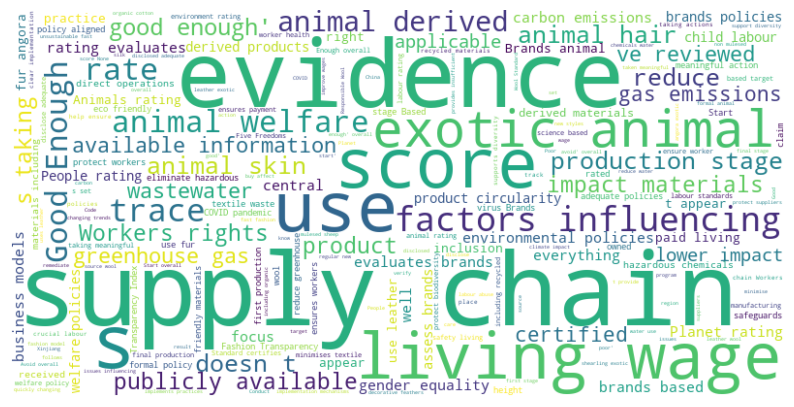

In [5]:
# word cloud for popular brands

text = ''

for description in brand_df['description']:
    if description:
        text += str(description)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display word cloud using matplotlib
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

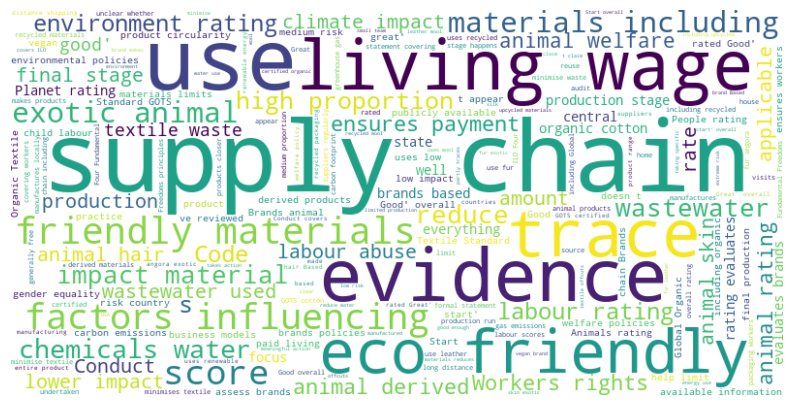

In [6]:
# word cloud for Good On You's recommended brands

text = ''

for description in gou_recommended_df['description']:
    if description:
        text += str(description)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display word cloud using matplotlib
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

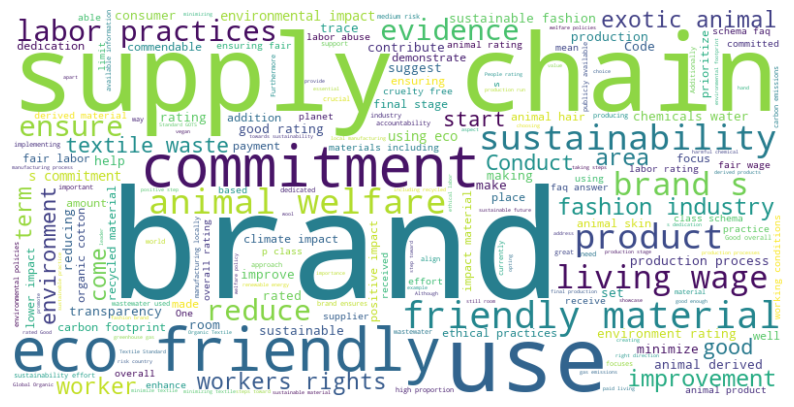

In [7]:
# word cloud for Sustainable Review's brands

text = ''

for description in sustainable_review_df['Description']:
    if description:
        text += str(description)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display word cloud using matplotlib
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

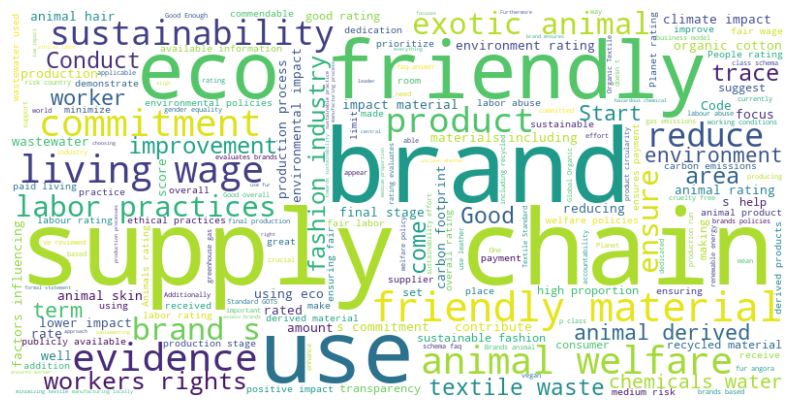

In [8]:
# word cloud for all three datasets

text = ''

for description in brand_df['description']:
    if description:
        text += str(description)

for description in gou_recommended_df['description']:
    if description:
        text += str(description)

for description in sustainable_review_df['Description']:
    if description:
        text += str(description)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display word cloud using matplotlib
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# !python -m spacy download en_core_web_lg

nlp_web = spacy.load("en_core_web_lg")

In [10]:
# popular brands (list created by us)

ner_results = []
entities = []

for description in brand_df['description']:
    text = str(description)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

brand_df['ner_results'] = ner_results

for ner_result in brand_df['ner_results']:
    for ent in ner_result:
        entities.append(ent.text)

In [11]:
# example of entities for a brand

example_brand = brand_df.iloc[40, :]
for ent in example_brand['ner_results']:
    print(ent.text, ent.label_)

Arc’teryx ORG
Amer Sports ORG
a Code of Conduct LAW
second ORDINAL
angora ORG
the Responsible Down Standard ORG
Arc’teryx GPE
September 2019 DATE


In [12]:
# Good On You's recommended brands

ner_results = []

for description in gou_recommended_df['description']:
    text = str(description)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

gou_recommended_df['ner_results'] = ner_results

for ner_result in gou_recommended_df['ner_results']:
    for ent in ner_result:
        entities.append(ent.text)

In [13]:
# Sustainable Review's brand ratings

ner_results = []

for description in sustainable_review_df['Description']:
    text = str(description)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

sustainable_review_df['ner_results'] = ner_results

for ner_result in sustainable_review_df['ner_results']:
    for ent in ner_result:
        entities.append(ent.text)

In [14]:
# get counts of all entities
ent_counts = Counter(entities)

In [28]:
# sample of entity counts
sample_ents = list(sorted(ent_counts.items(), key=lambda x: x[1], reverse=True))[:16]
sample_ents

[('One', 848),
 ('angora', 734),
 ('a Code of Conduct', 624),
 ('GOTS', 455),
 ('Global Organic Textile Standard', 310),
 ('Code of Conduct', 243),
 ('USA', 133),
 ('first', 132),
 ('Four', 131),
 ('one', 105),
 ('Portugal', 104),
 ('second', 92),
 ('Italy', 76),
 ('the European Union', 66),
 ('Not Good Enough', 65),
 ('the International Labour Organization', 64)]

Relevant entities:
* Global Organic Textile Standard (806 times)
* International Labour Organization (79)
* Bluesign (46)
* Responsible Wool Standard (36)
* Fairtrade International (52)
* Social Accountability International (32)
* PETA (23)
* Responsible Down Standard (25)
* Business Social Compliance Initiative Code of Conduct (33)
* Fair Trade USA (13)

### Qualitative (pt. 2):
#### Answer/Update to Question/Claim
I was able to parse through each of the brand's descriptions to create word clouds and extract entities. We now have a better idea of the popular standards, certificates, and organization to look for when evaluating materials/brands.
#### Summary
I first created word clouds, but the results did not show any standards/certificates, since word clouds do not take sentiment or nuance into consideration, only _frequency_. Getting named entities using spaCy's NER tool was much better. After looking through the entities in sorted order by frequency, I selected the ones that are related to sustainability/environmental practices:
* Global Organic Textile Standard (806 times)
* International Labour Organization (79)
* Bluesign (46)
* Responsible Wool Standard (36)
* Fairtrade International (52)
* Social Accountability International (32)
* PETA (23)
* Responsible Down Standard (25)
* Business Social Compliance Initiative Code of Conduct (33)
* Fair Trade USA (13)

We will use these to help us find an effective calculator for textile sustainability. We will examine the criteria and see if they take the above standards into consideration.

#### Uncertainty, Limitations & Caveats
- I did not combine the three datasets, so brands could have been repeated (meaning words/entities were could have also been repeated). 
- I manually found the relevant entities, so I might have omitted some important standards, certificates, or organizations (either from not knowing about them, human error, etc.).

#### Next Steps
Next, we will combine the datasets to remove duplicates and create an average overall brand rating. This allows us to quickly reference a brand and also makes it easier to analyze scores and descriptions.